In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import pylab

This notebook has three parts:

**Part 1: Load and plot projected water and sediment discharge through 2100**
- Outputs from each climate model are imported into the notebook
- Dataframes are cleaned up
- Data are reshaped to obtain mean annual water and sediment discharge
- Data are plotted 

**Part 2: Calculate average water and sediment discharge and annual sediment discharge for each time period**
- Summary statistic csv files are imported into the notebook
- Averages for water discharge, SSC, sediment discharge, and annual sediment discharge are taken over each climate model to get one value per time period.

**Part 3: Calculate annual present-day Qs using new rating curve**
- A rating curve generated using recent water discharge and SSC data is applied to the HydroTrend Qw data
- Annual sediment loads are obtained for each climate model for the year 2019

# Part 1: Load and plot projected water and sediment discharge through 2100

## Import ASCII Data

### GFDL-ESM2M

In [3]:
gfdl_csv = pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/GFDL-ESM2M/ASCII_data.csv')

gfdl = pd.DataFrame(gfdl_csv)
gfdl.head()

,Unnamed: 0,index,Qw(m3/s),index.1,Qs(kg/s),index.2,Qb(kg/s),index.3,CsBin 1,CsBin2,CsBin3,CsBin4,index.4,vel(m/s),wid(m),dep(m),index.5,temp(deg.C),prec(m)
0,0,1,4020.0,1,7.199,1,186.701,1,0.0,0.0,0.0,0.001,1,1.415,1708.06,1.663,1,22.91990,0.00000
1,1,2,4020.0,2,3.193,2,186.701,2,0.0,0.0,0.0,0.000,2,1.415,1708.06,1.663,2,22.53465,0.00000
2,2,3,4020.0,3,4.794,3,186.701,3,0.0,0.0,0.0,0.000,3,1.415,1708.06,1.663,3,21.63689,0.00021
3,3,4,4020.0,4,5.150,4,186.701,4,0.0,0.0,0.0,0.000,4,1.415,1708.06,1.663,4,19.58041,0.00038
4,4,5,4020.0,5,5.947,5,186.701,5,0.0,0.0,0.0,0.001,5,1.415,1708.06,1.663,5,20.87391,0.00002


In [4]:
gfdl.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,4020.0,7.199,186.701,0.0,0.0,0.0,0.001,1.415,1708.06,1.663,22.91990,0.00000
1,4020.0,3.193,186.701,0.0,0.0,0.0,0.000,1.415,1708.06,1.663,22.53465,0.00000
2,4020.0,4.794,186.701,0.0,0.0,0.0,0.000,1.415,1708.06,1.663,21.63689,0.00021
3,4020.0,5.150,186.701,0.0,0.0,0.0,0.000,1.415,1708.06,1.663,19.58041,0.00038
4,4020.0,5.947,186.701,0.0,0.0,0.0,0.001,1.415,1708.06,1.663,20.87391,0.00002
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,4020.0,0.967,186.701,0.0,0.0,0.0,0.000,1.415,1708.06,1.663,25.72992,0.00028
32846,4020.0,0.815,186.701,0.0,0.0,0.0,0.000,1.415,1708.06,1.663,25.92450,0.00005
32847,4020.0,0.582,186.701,0.0,0.0,0.0,0.000,1.415,1708.06,1.663,25.96800,0.00014
32848,4020.0,0.577,186.701,0.0,0.0,0.0,0.000,1.415,1708.06,1.663,26.04726,0.00002


### HadGEM2

In [5]:
hadgem_csv = pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/HadGEM2/ASCII_data.csv')
hadgem = pd.DataFrame(hadgem_csv)
hadgem.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,4020.000,10.587,186.701,0.001,0.001,0.001,0.001,1.415,1708.060,1.663,21.41460,0.00025
1,4020.000,4.536,186.701,0.000,0.000,0.000,0.000,1.415,1708.060,1.663,21.26117,0.00018
2,4020.000,6.930,186.701,0.000,0.000,0.000,0.001,1.415,1708.060,1.663,21.04922,0.00014
3,4020.000,7.467,186.701,0.000,0.000,0.000,0.001,1.415,1708.060,1.663,21.09900,0.00014
4,4020.000,8.675,186.701,0.000,0.000,0.001,0.001,1.415,1708.060,1.663,21.50776,0.00013
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,4020.110,3.285,186.706,0.000,0.000,0.000,0.000,1.415,1708.072,1.663,28.05300,0.00001
32846,4020.093,4.073,186.705,0.000,0.000,0.000,0.000,1.415,1708.070,1.663,28.19170,0.00002
32847,4020.077,4.672,186.705,0.000,0.000,0.000,0.000,1.415,1708.068,1.663,27.26784,0.00002
32848,4020.060,3.663,186.704,0.000,0.000,0.000,0.000,1.415,1708.067,1.663,27.21048,0.00001


### IPSL_CM5A

In [6]:
ipsl_csv = pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/IPSL_CM5A/ASCII_data.csv')
ipsl = pd.DataFrame(ipsl_csv)
ipsl.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,4020.000,2.984,186.701,0.0,0.0,0.0,0.0,1.415,1708.060,1.663,24.10703,0.00001
1,4020.000,1.461,186.701,0.0,0.0,0.0,0.0,1.415,1708.060,1.663,23.35829,0.00003
2,4020.000,2.087,186.701,0.0,0.0,0.0,0.0,1.415,1708.060,1.663,22.26592,0.00082
3,4020.000,2.223,186.701,0.0,0.0,0.0,0.0,1.415,1708.060,1.663,22.04867,0.00089
4,4020.000,2.523,186.701,0.0,0.0,0.0,0.0,1.415,1708.060,1.663,20.46654,0.00003
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,4023.025,0.693,186.842,0.0,0.0,0.0,0.0,1.415,1708.394,1.664,27.21186,0.00000
32846,4022.576,0.593,186.821,0.0,0.0,0.0,0.0,1.415,1708.344,1.664,28.00030,0.00000
32847,4022.142,0.438,186.801,0.0,0.0,0.0,0.0,1.415,1708.297,1.664,27.91454,0.00002
32848,4021.709,0.434,186.781,0.0,0.0,0.0,0.0,1.415,1708.249,1.664,28.32779,0.00001


### MIROC-ESM-CHEM

In [7]:
miroc_csv = pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/MIROC-ESM-CHEM/ASCII_data.csv')
miroc = pd.DataFrame(miroc_csv)
miroc.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,4020.000,9.775,186.701,0.0,0.0,0.001,0.001,1.415,1708.060,1.663,18.91612,0.00023
1,4020.000,4.308,186.701,0.0,0.0,0.000,0.000,1.415,1708.060,1.663,17.05532,0.00000
2,4020.000,6.489,186.701,0.0,0.0,0.000,0.001,1.415,1708.060,1.663,17.46898,0.00000
3,4020.000,6.974,186.701,0.0,0.0,0.000,0.001,1.415,1708.060,1.663,18.44453,0.00000
4,4020.000,8.062,186.701,0.0,0.0,0.001,0.001,1.415,1708.060,1.663,18.30215,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,4203.633,2.571,195.230,0.0,0.0,0.000,0.000,1.437,1728.012,1.693,31.55011,0.00001
32846,4185.357,3.101,194.381,0.0,0.0,0.000,0.000,1.435,1726.056,1.690,31.69424,0.00004
32847,4159.124,4.292,193.162,0.0,0.0,0.000,0.000,1.431,1723.236,1.686,31.51974,0.00000
32848,4138.249,2.525,192.193,0.0,0.0,0.000,0.000,1.429,1720.983,1.683,31.45897,0.00000


### NORESM-M

In [8]:
noresm_csv = pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/NORESM-M/ASCII_data.csv')
noresm = pd.DataFrame(noresm_csv)
noresm.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,4020.000,7.428,186.701,0.0,0.0,0.0,0.001,1.415,1708.060,1.663,24.58687,0.00055
1,4020.000,3.279,186.701,0.0,0.0,0.0,0.000,1.415,1708.060,1.663,22.08579,0.00014
2,4020.000,4.935,186.701,0.0,0.0,0.0,0.000,1.415,1708.060,1.663,21.77352,0.00001
3,4020.000,5.304,186.701,0.0,0.0,0.0,0.000,1.415,1708.060,1.663,22.08359,0.00001
4,4020.000,6.129,186.701,0.0,0.0,0.0,0.001,1.415,1708.060,1.663,22.71624,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,4022.790,2.598,186.831,0.0,0.0,0.0,0.000,1.415,1708.368,1.664,22.21937,0.00000
32846,4022.218,3.246,186.804,0.0,0.0,0.0,0.000,1.415,1708.305,1.664,23.46794,0.00003
32847,4021.644,4.755,186.777,0.0,0.0,0.0,0.000,1.415,1708.242,1.664,24.08362,0.00004
32848,4021.102,2.718,186.752,0.0,0.0,0.0,0.000,1.415,1708.182,1.663,24.68819,0.00007


## Reshape: Qw

In [9]:
gfdl_qw = np.array(gfdl['Qw(m3/s)'])
gfdl_qw_reshape = gfdl_qw.reshape(90,365)
gfdl_qw_mean_rows = np.mean(gfdl_qw_reshape, axis = 1)

hadgem_qw = np.array(hadgem['Qw(m3/s)'])
hadgem_qw_reshape = hadgem_qw.reshape(90,365)
hadgem_qw_mean_rows = np.mean(hadgem_qw_reshape, axis = 1)

ipsl_qw = np.array(ipsl['Qw(m3/s)'])
ipsl_qw_reshape = ipsl_qw.reshape(90,365)
ipsl_qw_mean_rows = np.mean(ipsl_qw_reshape, axis = 1)

miroc_qw = np.array(miroc['Qw(m3/s)'])
miroc_qw_reshape = miroc_qw.reshape(90,365)
miroc_qw_mean_rows = np.mean(miroc_qw_reshape, axis = 1)

noresm_qw = np.array(noresm['Qw(m3/s)'])
noresm_qw_reshape = noresm_qw.reshape(90,365)
noresm_qw_mean_rows = np.mean(noresm_qw_reshape, axis = 1)

## Plot

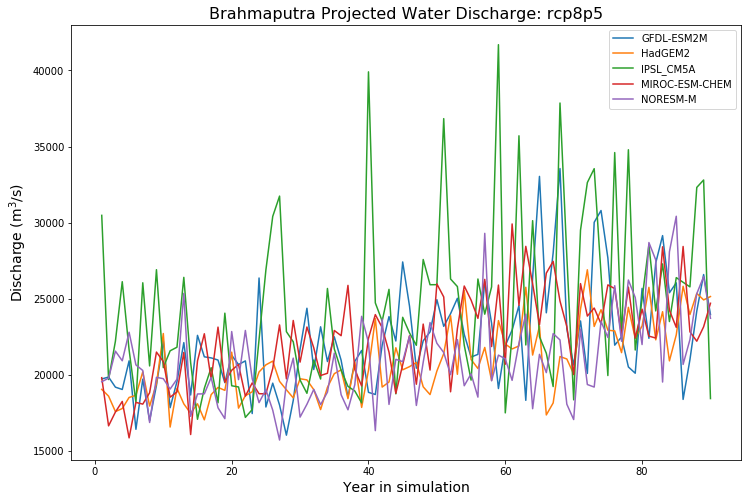

In [10]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qw_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qw_mean_rows, color = 'tab:orange', label = 'HadGEM2')
plt.plot(years, ipsl_qw_mean_rows, color = 'tab:green', label = 'IPSL_CM5A')
plt.plot(years, miroc_qw_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qw_mean_rows, color = 'tab:purple', label = 'NORESM-M')
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Brahmaputra Projected Water Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qw_rcp8p5_notrend_color.png')

In [11]:
# calc the trendline for gfdl
z_gfdl = np.polyfit(years, gfdl_qw_mean_rows, 1)
p_gfdl = np.poly1d(z_gfdl)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_gfdl[0],z_gfdl[1]), '(GFDL-ESM2M)')

# calc the trendline for hadgem
z_hadgem = np.polyfit(years, hadgem_qw_mean_rows, 1)
p_hadgem = np.poly1d(z_hadgem)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_hadgem[0],z_hadgem[1]), '(HadGEM2)')

# calc the trendline for ipsl
z_ipsl = np.polyfit(years, ipsl_qw_mean_rows, 1)
p_ipsl = np.poly1d(z_ipsl)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_ipsl[0],z_ipsl[1]), '(IPSL_CM5A)')

# calc the trendline for miroc
z_miroc = np.polyfit(years, miroc_qw_mean_rows, 1)
p_miroc = np.poly1d(z_miroc)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_miroc[0],z_miroc[1]), '(MIROC-ESM-CHEM)')

# calc the trendline for noresm
z_noresm = np.polyfit(years, noresm_qw_mean_rows, 1)
p_noresm = np.poly1d(z_noresm)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_noresm[0],z_noresm[1]), '(NORESM-M)')

y=73.1x+(18956.9) (GFDL-ESM2M)
y=68.7x+(17694.5) (HadGEM2)
y=73.1x+(21164.0) (IPSL_CM5A)
y=78.1x+(18726.5) (MIROC-ESM-CHEM)
y=57.0x+(18430.9) (NORESM-M)


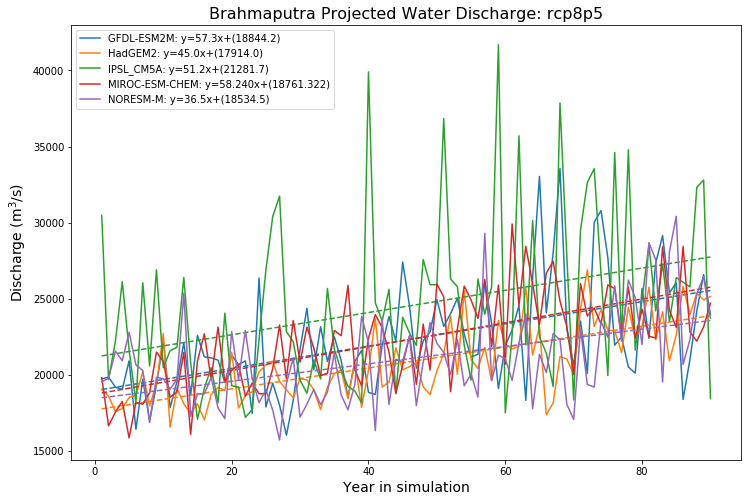

In [12]:
fig, axs = plt.subplots(figsize = (12, 8))

plt.plot(years, gfdl_qw_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M: y=57.3x+(18844.2)')
pylab.plot(years,p_gfdl(years), color = 'tab:blue', linestyle = 'dashed')

plt.plot(years, hadgem_qw_mean_rows, color = 'tab:orange', label = 'HadGEM2: y=45.0x+(17914.0)')
pylab.plot(years,p_hadgem(years), color = 'tab:orange', linestyle = 'dashed' )

plt.plot(years, ipsl_qw_mean_rows, color = 'tab:green', label = 'IPSL_CM5A: y=51.2x+(21281.7)')
pylab.plot(years,p_ipsl(years), color = 'tab:green', linestyle = 'dashed')

plt.plot(years, miroc_qw_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM: y=58.240x+(18761.322)')
pylab.plot(years,p_miroc(years), color = 'tab:red', linestyle = 'dashed')

plt.plot(years, noresm_qw_mean_rows, color = 'tab:purple', label = 'NORESM-M: y=36.5x+(18534.5)')
pylab.plot(years,p_noresm(years), color = 'tab:purple', linestyle = 'dashed')

plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Brahmaputra Projected Water Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qw_rcp8p5_trend_color.png')

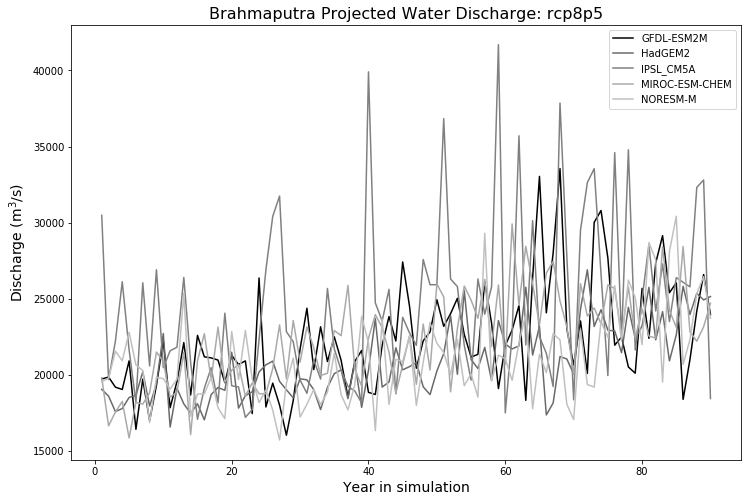

In [13]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qw_mean_rows, color = 'black', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qw_mean_rows, color = 'dimgray', label = 'HadGEM2')
plt.plot(years, ipsl_qw_mean_rows, color = 'gray', label = 'IPSL_CM5A')
plt.plot(years, miroc_qw_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qw_mean_rows, color = 'silver', label = 'NORESM-M')
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Brahmaputra Projected Water Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qw_rcp8p5_notrend_bw.png')

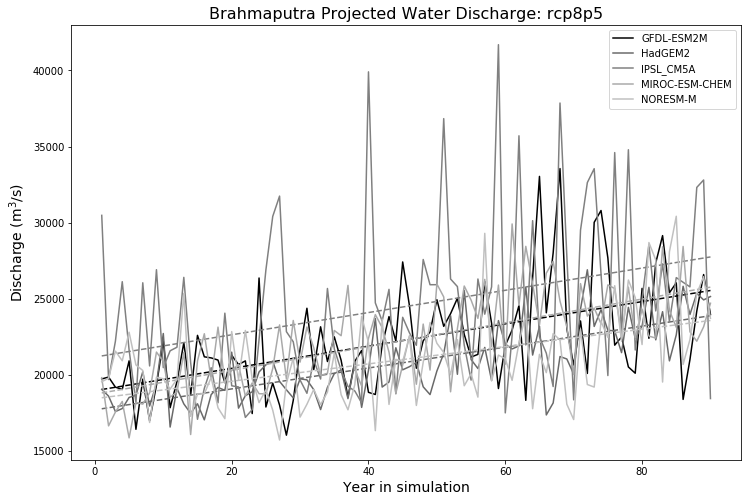

In [14]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qw_mean_rows, color = 'black', label = 'GFDL-ESM2M')
pylab.plot(years,p_gfdl(years), color = 'black', linestyle = 'dashed')

plt.plot(years, hadgem_qw_mean_rows, color = 'dimgray', label = 'HadGEM2')
pylab.plot(years,p_hadgem(years), color = 'dimgray', linestyle = 'dashed' )

plt.plot(years, ipsl_qw_mean_rows, color = 'gray', label = 'IPSL_CM5A')
pylab.plot(years,p_ipsl(years), color = 'gray', linestyle = 'dashed')

plt.plot(years, miroc_qw_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
pylab.plot(years,p_miroc(years), color = 'darkgray', linestyle = 'dashed')

plt.plot(years, noresm_qw_mean_rows, color = 'silver', label = 'NORESM-M')
pylab.plot(years,p_noresm(years), color = 'silver', linestyle = 'dashed')

plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Brahmaputra Projected Water Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qw_rcp8p5_trend_bw.png')

## Reshape: Qs

In [15]:
gfdl_qs = np.array(gfdl['Qs(kg/s)'])
gfdl_qs_reshape = gfdl_qs.reshape(90,365)
gfdl_qs_mean_rows = np.mean(gfdl_qs_reshape, axis = 1)

hadgem_qs = np.array(hadgem['Qs(kg/s)'])
hadgem_qs_reshape = hadgem_qs.reshape(90,365)
hadgem_qs_mean_rows = np.mean(hadgem_qs_reshape, axis = 1)

ipsl_qs = np.array(ipsl['Qs(kg/s)'])
ipsl_qs_reshape = ipsl_qs.reshape(90,365)
ipsl_qs_mean_rows = np.mean(ipsl_qs_reshape, axis = 1)

miroc_qs = np.array(miroc['Qs(kg/s)'])
miroc_qs_reshape = miroc_qs.reshape(90,365)
miroc_qs_mean_rows = np.mean(miroc_qs_reshape, axis = 1)

noresm_qs = np.array(noresm['Qs(kg/s)'])
noresm_qs_reshape = noresm_qs.reshape(90,365)
noresm_qs_mean_rows = np.mean(noresm_qs_reshape, axis = 1)

## Plot

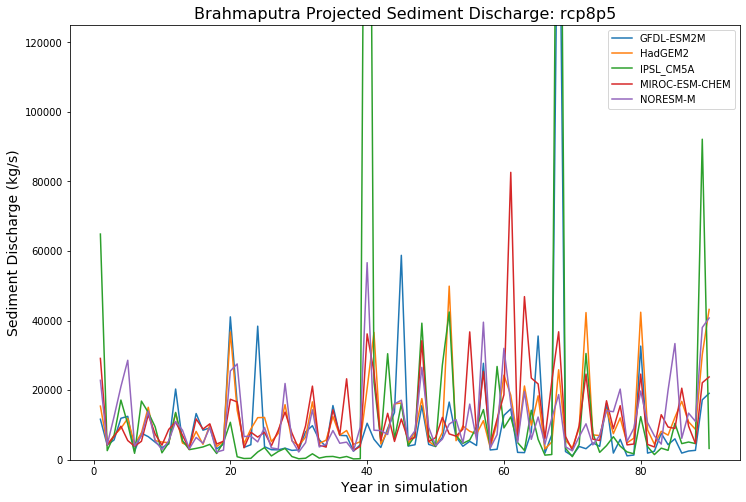

In [16]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qs_mean_rows, color = 'tab:orange', label = 'HadGEM2')
plt.plot(years, ipsl_qs_mean_rows, color = 'tab:green', label = 'IPSL_CM5A')
plt.plot(years, miroc_qs_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qs_mean_rows, color = 'tab:purple', label = 'NORESM-M')
plt.ylim(0, 1.25e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Brahmaputra Projected Sediment Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qs_rcp8p5_notrend_color.png')

In [17]:
# calc the trendline for gfdl
z_gfdl = np.polyfit(years, gfdl_qs_mean_rows, 1)
p_gfdl = np.poly1d(z_gfdl)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_gfdl[0],z_gfdl[1]), '(GFDL-ESM2M)')

# calc the trendline for hadgem
z_hadgem = np.polyfit(years, hadgem_qs_mean_rows, 1)
p_hadgem = np.poly1d(z_hadgem)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_hadgem[0],z_hadgem[1]), '(HadGEM2)')

# calc the trendline for ipsl
z_ipsl = np.polyfit(years, ipsl_qs_mean_rows, 1)
p_ipsl = np.poly1d(z_ipsl)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_ipsl[0],z_ipsl[1]), '(IPSL_CM5A)')

# calc the trendline for miroc
z_miroc = np.polyfit(years, miroc_qs_mean_rows, 1)
p_miroc = np.poly1d(z_miroc)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_miroc[0],z_miroc[1]), '(MIROC-ESM-CHEM)')

# calc the trendline for noresm
z_noresm = np.polyfit(years, noresm_qs_mean_rows, 1)
p_noresm = np.poly1d(z_noresm)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_noresm[0],z_noresm[1]), '(NORESM-M)')

y=49.7x+(8405.9) (GFDL-ESM2M)
y=89.1x+(7534.5) (HadGEM2)
y=99.7x+(10672.2) (IPSL_CM5A)
y=92.7x+(8429.6) (MIROC-ESM-CHEM)
y=70.8x+(8464.0) (NORESM-M)


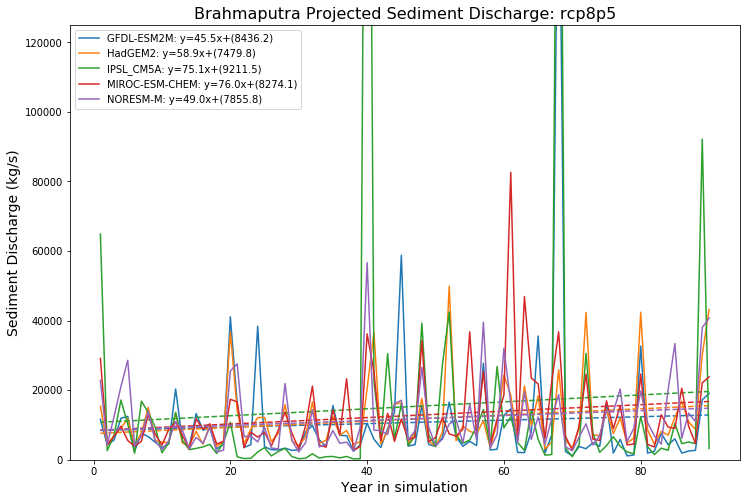

In [18]:
fig, axs = plt.subplots(figsize = (12, 8))

plt.plot(years, gfdl_qs_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M: y=45.5x+(8436.2)')
pylab.plot(years,p_gfdl(years), color = 'tab:blue', linestyle = 'dashed')

plt.plot(years, hadgem_qs_mean_rows, color = 'tab:orange', label = 'HadGEM2: y=58.9x+(7479.8)')
pylab.plot(years,p_hadgem(years), color = 'tab:orange', linestyle = 'dashed' )

plt.plot(years, ipsl_qs_mean_rows, color = 'tab:green', label = 'IPSL_CM5A: y=75.1x+(9211.5)')
pylab.plot(years,p_ipsl(years), color = 'tab:green', linestyle = 'dashed')

plt.plot(years, miroc_qs_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM: y=76.0x+(8274.1)')
pylab.plot(years,p_miroc(years), color = 'tab:red', linestyle = 'dashed')

plt.plot(years, noresm_qs_mean_rows, color = 'tab:purple', label = 'NORESM-M: y=49.0x+(7855.8)')
pylab.plot(years,p_noresm(years), color = 'tab:purple', linestyle = 'dashed')

plt.ylim(0, 1.25e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Brahmaputra Projected Sediment Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qs_rcp8p5_trend_color.png')

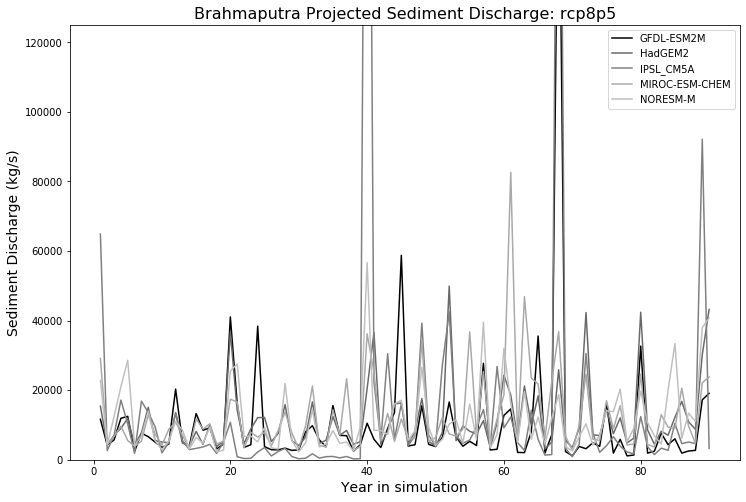

In [19]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'black', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qs_mean_rows, color = 'dimgray', label = 'HadGEM2')
plt.plot(years, ipsl_qs_mean_rows, color = 'gray', label = 'IPSL_CM5A')
plt.plot(years, miroc_qs_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qs_mean_rows, color = 'silver', label = 'NORESM-M')
plt.ylim(0, 1.25e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Brahmaputra Projected Sediment Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qs_rcp8p5_notrend_bw.png')

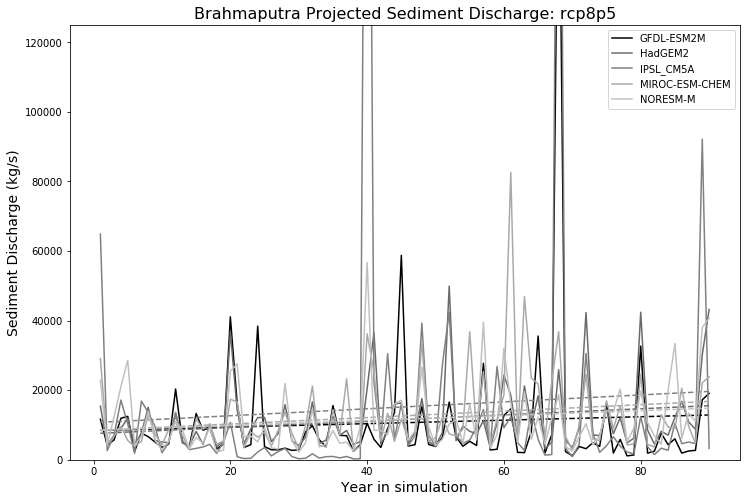

In [20]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'black', label = 'GFDL-ESM2M')
pylab.plot(years,p_gfdl(years), color = 'black', linestyle = 'dashed')

plt.plot(years, hadgem_qs_mean_rows, color = 'dimgray', label = 'HadGEM2')
pylab.plot(years,p_hadgem(years), color = 'dimgray', linestyle = 'dashed' )

plt.plot(years, ipsl_qs_mean_rows, color = 'gray', label = 'IPSL_CM5A')
pylab.plot(years,p_ipsl(years), color = 'gray', linestyle = 'dashed')

plt.plot(years, miroc_qs_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
pylab.plot(years,p_miroc(years), color = 'darkgray', linestyle = 'dashed')

plt.plot(years, noresm_qs_mean_rows, color = 'silver', label = 'NORESM-M')
pylab.plot(years,p_noresm(years), color = 'silver', linestyle = 'dashed')

plt.ylim(0, 1.25e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Brahmaputra Projected Sediment Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qs_rcp8p5_trend_bw.png')

# Part 2: Calculate average water and sediment discharge and annual sediment discharge for each time period

## Import Summary Statistics

### GFDL-ESM2M

In [21]:
gfdl_2000 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/reference/GFDL-ESM2M/summ_stats_v3.csv'))
gfdl_2020 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/GFDL-ESM2M/2020/summ_stats_v3.csv'))
gfdl_2040 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/GFDL-ESM2M/2040/summ_stats_v3.csv'))
gfdl_2060 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/GFDL-ESM2M/2060/summ_stats_v3.csv'))
gfdl_2080 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/GFDL-ESM2M/2080/summ_stats_v3.csv'))

frames_gfdl = [gfdl_2000, gfdl_2020, gfdl_2040, gfdl_2060, gfdl_2080]
concat_gfdl = pd.concat(frames_gfdl)
concat_gfdl.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])
concat_gfdl

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,18916.085340,7501.209412,0.164265,878.521081,115378.905013,4.125890e+05,5.536896,5358.550596,18834.751563,...,8248.909093,213.675588,0.028749,383.104665,44782.220609,21090.449759,0.470482,2079.823820,200,202
0,2020,19751.423248,9230.346468,0.179787,917.316738,130820.585431,7.477247e+05,9.004334,6075.709646,19502.529966,...,8458.856938,199.543916,0.026989,392.855287,47404.100399,20135.533062,0.447294,2201.591967,201,191
0,2040,21107.488304,10336.747356,0.162823,980.296563,155350.566261,1.359865e+06,12.190257,7214.957270,21979.984924,...,9172.281799,165.031733,0.021953,425.988928,51121.326429,17938.122859,0.365362,2374.231357,211,230
0,2060,23646.519275,11594.311444,0.163171,1098.216957,239088.116705,1.526859e+06,9.990689,11103.986212,25863.505733,...,9936.579850,196.481420,0.023775,461.485276,57815.058117,22743.872870,0.405399,2685.108808,207,208
0,2080,24724.478034,13589.473884,0.128470,1148.280671,241165.567432,5.906600e+06,24.907884,11200.469402,27700.092460,...,10597.372650,116.059999,0.013513,492.174523,60674.791750,12936.066923,0.207745,2817.923619,202,193


In [22]:
gfdl_change = ((gfdl_2080 - gfdl_2000)/gfdl_2000)*100
concat_gfdl = concat_gfdl.append(gfdl_change)
concat_gfdl.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,18916.08534,7501.20941,0.16427,878.52108,115378.90501,4.125890e+05,5.53690,5358.55060,18834.75156,...,8248.90909,213.67559,0.02875,383.10466,44782.22061,21090.44976,0.47048,2079.82382,200.0,202.00000
0,2020,19751.42325,9230.34647,0.17979,917.31674,130820.58543,7.477247e+05,9.00433,6075.70965,19502.52997,...,8458.85694,199.54392,0.02699,392.85529,47404.10040,20135.53306,0.44729,2201.59197,201.0,191.00000
0,2040,21107.48830,10336.74736,0.16282,980.29656,155350.56626,1.359865e+06,12.19026,7214.95727,21979.98492,...,9172.28180,165.03173,0.02195,425.98893,51121.32643,17938.12286,0.36536,2374.23136,211.0,230.00000
0,2060,23646.51927,11594.31144,0.16317,1098.21696,239088.11671,1.526859e+06,9.99069,11103.98621,25863.50573,...,9936.57985,196.48142,0.02377,461.48528,57815.05812,22743.87287,0.40540,2685.10881,207.0,208.00000
0,2080,24724.47803,13589.47388,0.12847,1148.28067,241165.56743,5.906600e+06,24.90788,11200.46940,27700.09246,...,10597.37265,116.06000,0.01351,492.17452,60674.79175,12936.06692,0.20775,2817.92362,202.0,193.00000
0,NaN,30.70610,81.16377,-21.79139,30.70610,109.02050,1.331594e+03,349.85287,109.02050,47.06906,...,28.46999,-45.68402,-52.99484,28.46999,35.48857,-38.66386,-55.84418,35.48857,1.0,-4.45545


### HadGEM2

In [23]:
hadgem_2000 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/reference/HadGEM2/summ_stats_v3.csv'))
hadgem_2020 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/HadGEM2/2020/summ_stats_v3.csv'))
hadgem_2040 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/HadGEM2/2040/summ_stats_v3.csv'))
hadgem_2060 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/HadGEM2/2060/summ_stats_v3.csv'))
hadgem_2080 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/HadGEM2/2080/summ_stats_v3.csv'))

frames_hadgem = [hadgem_2000, hadgem_2020, hadgem_2040, hadgem_2060, hadgem_2080]
concat_hadgem = pd.concat(frames_hadgem)
concat_hadgem.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [24]:
hadgem_change = ((hadgem_2080 - hadgem_2000)/hadgem_2000)*100
concat_hadgem = concat_hadgem.append(hadgem_change)
concat_hadgem.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,18172.09489,7795.40913,0.18060,843.96788,86025.36822,718983.27423,10.28234,3995.28222,17373.41009,...,7976.81873,191.62658,0.02803,370.46795,44778.40846,22040.93112,0.50055,2079.64677,192.00000,184.00000
0,2020,18919.03183,8881.38325,0.20406,878.65793,85350.42431,528535.71433,7.67121,3963.93576,17637.12492,...,9235.91173,281.72675,0.03437,428.94410,45724.78757,24192.53917,0.54844,2123.59952,190.00000,193.00000
0,2040,19622.12800,9509.40641,0.21250,911.31187,85350.54190,382397.20659,5.79619,3963.94122,18310.68707,...,10357.00357,415.47494,0.04333,481.01104,46810.82582,25707.36355,0.57072,2174.03847,189.00000,187.00000
0,2060,21046.82058,11762.21747,0.23324,977.47897,115242.36046,699098.48073,8.23982,5352.20905,20136.37527,...,11014.75673,420.34451,0.04282,511.55912,49982.44911,29301.67579,0.61107,2321.33840,190.00000,191.00000
0,2080,22947.47938,14024.74425,0.25534,1065.75140,98906.70392,588028.59338,7.90752,4593.53100,21676.60902,...,13065.78864,642.86616,0.05306,606.81534,55363.24395,34024.03360,0.63042,2571.23903,191.00000,191.00000
0,NaN,26.27867,79.91030,41.38793,26.27867,14.97388,-18.21387,-23.09609,14.97388,24.76888,...,63.79699,235.47860,89.26664,63.79699,23.63826,54.36750,25.94558,23.63826,-0.52083,3.80435


### IPSL_CM5A

In [25]:
ipsl_2000 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/reference/IPSL_CM5A/summ_stats_v3.csv'))
ipsl_2020 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/IPSL_CM5A/2020/summ_stats_v3.csv'))
ipsl_2040 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/IPSL_CM5A/2040/summ_stats_v3.csv'))
ipsl_2060 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/IPSL_CM5A/2060/summ_stats_v3.csv'))
ipsl_2080 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/IPSL_CM5A/2080/summ_stats_v3.csv'))

frames_ipsl = [ipsl_2000, ipsl_2020, ipsl_2040, ipsl_2060, ipsl_2080]
concat_ipsl = pd.concat(frames_ipsl)
concat_ipsl.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [26]:
ipsl_change = ((ipsl_2080 - ipsl_2000)/ipsl_2000)*100
concat_ipsl = concat_ipsl.append(ipsl_change)
concat_ipsl.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,18990.21125,8159.19742,0.14099,881.96372,147818.91816,1.150347e+06,11.74958,6865.16441,20104.31415,...,8130.55402,127.83395,0.01819,377.60789,49175.15698,16154.57759,0.33955,2283.84527,214.00000,213.00000
0,2020,22338.78695,10479.63588,0.15521,1037.48185,149663.86220,8.408706e+05,8.42389,6950.84927,24223.46432,...,10079.46379,173.92438,0.01991,468.12125,56435.85279,20630.72068,0.37937,2621.05428,214.00000,212.00000
0,2040,23001.75494,12187.90196,0.06111,1068.27212,327867.89100,1.857782e+07,56.66251,15227.19151,26546.57583,...,9943.59882,26.26529,0.00314,461.81126,58487.38595,3238.80878,0.05590,2716.33378,214.00000,170.00000
0,2060,25383.81150,14907.25981,0.19855,1178.90214,274268.92771,1.032158e+06,6.03396,12737.89109,29814.31858,...,9716.35475,222.25948,0.02851,451.25735,65890.15659,31660.73947,0.49715,3060.14117,215.00000,182.00000
0,2080,26779.63456,17451.98413,0.12741,1243.72845,276926.28584,9.353046e+06,33.77450,12861.30696,32331.15712,...,10376.33832,97.37662,0.01259,481.90901,67653.51083,13083.13718,0.19002,3142.03676,174.00000,179.00000
0,NaN,41.01810,113.89339,-9.63568,41.01810,87.34157,7.130634e+02,187.45280,87.34157,60.81701,...,27.62154,-23.82570,-30.80876,27.62154,37.57660,-19.01282,-44.03670,37.57660,-18.69159,-15.96244


### MIROC-ESM-CHEM

In [27]:
miroc_2000 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/reference/MIROC-ESM-CHEM/summ_stats_v3.csv'))
miroc_2020 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/MIROC-ESM-CHEM/2020/summ_stats_v3.csv'))
miroc_2040 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/MIROC-ESM-CHEM/2040/summ_stats_v3.csv'))
miroc_2060 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/MIROC-ESM-CHEM/2060/summ_stats_v3.csv'))
miroc_2080 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/MIROC-ESM-CHEM/2080/summ_stats_v3.csv'))

frames_miroc = [miroc_2000, miroc_2020, miroc_2040, miroc_2060, miroc_2080]
concat_miroc = pd.concat(frames_miroc)
concat_miroc.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [28]:
miroc_change = ((miroc_2080 - miroc_2000)/miroc_2000)*100
concat_miroc = concat_miroc.append(miroc_change)
concat_miroc.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,19284.00858,8291.34981,0.18562,895.60857,118057.43050,3.509053e+05,5.22602,5482.94954,18427.91174,...,9490.61523,308.39066,0.03542,440.77331,46582.20808,24000.54756,0.51744,2163.42076,206.0000,203.00000
0,2020,19594.58272,9435.04776,0.21008,910.03258,96808.76295,4.273551e+05,6.42189,4496.09618,18100.46337,...,10057.49458,381.88248,0.04036,467.10093,46725.87761,25476.47002,0.57432,2170.09322,213.0000,212.00000
0,2040,21261.59366,11402.96888,0.20340,987.45369,108781.78456,1.611984e+06,14.85200,5052.16007,20107.70590,...,12415.80544,487.05769,0.04160,576.62812,50597.00611,23520.62320,0.47678,2349.88031,207.0000,201.00000
0,2060,23598.34454,14090.38812,0.23827,1095.97957,168742.20949,1.063254e+06,7.64787,7836.90630,23524.01883,...,14506.77787,885.40580,0.06379,673.73930,57170.64874,33269.88250,0.60544,2655.18046,196.0000,199.00000
0,2080,24683.25857,16554.87842,0.25248,1146.36631,170239.35318,1.311764e+06,12.64208,7906.43825,23668.71079,...,15921.51852,956.71081,0.06317,739.44420,57732.68222,31535.29281,0.56351,2681.28302,198.0000,193.00000
0,NaN,27.99859,99.66446,36.02363,27.99859,44.20046,2.738229e+02,141.90658,44.20046,28.43946,...,67.76066,210.22691,78.35112,67.76066,23.93720,31.39406,8.90395,23.93720,-3.8835,-4.92611


### NORESM-M

In [29]:
noresm_2000 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/reference/NORESM-M/summ_stats_v3.csv'))
noresm_2020 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/NORESM-M/2020/summ_stats_v3.csv'))
noresm_2040 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/NORESM-M/2040/summ_stats_v3.csv'))
noresm_2060 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/NORESM-M/2060/summ_stats_v3.csv'))
noresm_2080 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp8p5/NORESM-M/2080/summ_stats_v3.csv'))

frames_noresm = [noresm_2000, noresm_2020, noresm_2040, noresm_2060, noresm_2080]
concat_noresm = pd.concat(frames_noresm)
concat_noresm.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [30]:
noresm_change = ((noresm_2080 - noresm_2000)/noresm_2000)*100
concat_noresm = concat_noresm.append(noresm_change)
concat_noresm.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,18946.89809,8061.00978,0.16801,879.95212,78606.70947,5.626772e+05,7.43967,3650.73693,18611.27799,...,8722.49463,209.37628,0.02695,405.09943,48911.84959,21466.46470,0.45524,2271.61647,190.00000,201.00000
0,2020,19638.86968,8974.53991,0.18044,912.08941,114820.99534,5.240964e+05,5.36847,5332.63956,19432.89086,...,8532.74712,198.10936,0.02645,396.28697,48883.15134,23529.49404,0.47902,2270.28363,191.00000,197.00000
0,2040,19755.62838,9870.64071,0.18637,917.51204,114854.54589,1.170673e+06,12.67037,5334.19775,19729.20918,...,9038.18713,218.48391,0.02698,419.76116,48497.49391,22179.31278,0.46061,2252.37252,195.00000,188.00000
0,2060,20697.26917,11221.64140,0.21334,961.24473,128060.35673,6.041684e+05,7.56135,5947.51615,20548.52872,...,10237.79097,356.29867,0.03970,475.47445,50854.34160,26535.24018,0.54625,2361.83176,190.00000,191.00000
0,2080,22886.77674,13203.09080,0.22382,1062.93218,130584.43867,1.000002e+06,10.73829,6064.74227,23185.01141,...,12291.41301,508.88942,0.04515,570.85096,55384.38687,31118.14533,0.56134,2572.22097,196.00000,196.00000
0,NaN,20.79432,63.78954,33.21777,20.79432,66.12378,7.772207e+01,44.33822,66.12378,24.57506,...,40.91626,143.05018,67.53323,40.91626,13.23307,44.96167,23.30479,13.23307,3.15789,-2.48756


### Average Water Discharge

In [31]:
avg_qw_ref = (gfdl_2000['Mean Qw']+hadgem_2000['Mean Qw']+ipsl_2000['Mean Qw']+miroc_2000['Mean Qw']+noresm_2000['Mean Qw'])/5
avg_qw_2020 = (gfdl_2020['Mean Qw']+hadgem_2020['Mean Qw']+ipsl_2020['Mean Qw']+miroc_2020['Mean Qw']+noresm_2020['Mean Qw'])/5
avg_qw_2040 = (gfdl_2040['Mean Qw']+hadgem_2040['Mean Qw']+ipsl_2040['Mean Qw']+miroc_2040['Mean Qw']+noresm_2040['Mean Qw'])/5
avg_qw_2060 = (gfdl_2060['Mean Qw']+hadgem_2060['Mean Qw']+ipsl_2060['Mean Qw']+miroc_2060['Mean Qw']+noresm_2060['Mean Qw'])/5
avg_qw_2080 = (gfdl_2080['Mean Qw']+hadgem_2080['Mean Qw']+ipsl_2080['Mean Qw']+miroc_2080['Mean Qw']+noresm_2080['Mean Qw'])/5

In [32]:
print(np.asarray(avg_qw_ref).round(0), 'm^3/s')
print(np.asarray(avg_qw_2020).round(0), 'm^3/s')
print(np.asarray(avg_qw_2040).round(0), 'm^3/s')
print(np.asarray(avg_qw_2060).round(0), 'm^3/s')
print(np.asarray(avg_qw_2080).round(0), 'm^3/s')

[18862.] m^3/s
[20049.] m^3/s
[20950.] m^3/s
[22875.] m^3/s
[24404.] m^3/s


### Average Sediment Discharge

In [33]:
avg_qs_ref = (gfdl_2000['Mean Qs']+hadgem_2000['Mean Qs']+ipsl_2000['Mean Qs']+miroc_2000['Mean Qs']+noresm_2000['Mean Qs'])/5
avg_qs_2020 = (gfdl_2020['Mean Qs']+hadgem_2020['Mean Qs']+ipsl_2020['Mean Qs']+miroc_2020['Mean Qs']+noresm_2020['Mean Qs'])/5
avg_qs_2040 = (gfdl_2040['Mean Qs']+hadgem_2040['Mean Qs']+ipsl_2040['Mean Qs']+miroc_2040['Mean Qs']+noresm_2040['Mean Qs'])/5
avg_qs_2060 = (gfdl_2060['Mean Qs']+hadgem_2060['Mean Qs']+ipsl_2060['Mean Qs']+miroc_2060['Mean Qs']+noresm_2060['Mean Qs'])/5
avg_qs_2080 = (gfdl_2080['Mean Qs']+hadgem_2080['Mean Qs']+ipsl_2080['Mean Qs']+miroc_2080['Mean Qs']+noresm_2080['Mean Qs'])/5

In [34]:
print(np.asarray(avg_qs_ref).round(0), 'kg/s')
print(np.asarray(avg_qs_2020).round(0), 'kg/s')
print(np.asarray(avg_qs_2040).round(0), 'kg/s')
print(np.asarray(avg_qs_2060).round(0), 'kg/s')
print(np.asarray(avg_qs_2080).round(0), 'kg/s')

[7962.] kg/s
[9400.] kg/s
[10662.] kg/s
[12715.] kg/s
[14965.] kg/s


### Average SSC

In [35]:
avg_SSC_ref = (gfdl_2000['Mean SSC']+hadgem_2000['Mean SSC']+ipsl_2000['Mean SSC']+miroc_2000['Mean SSC']+noresm_2000['Mean SSC'])/5
avg_SSC_2020 = (gfdl_2020['Mean SSC']+hadgem_2020['Mean SSC']+ipsl_2020['Mean SSC']+miroc_2020['Mean SSC']+noresm_2020['Mean SSC'])/5
avg_SSC_2040 = (gfdl_2040['Mean SSC']+hadgem_2040['Mean SSC']+ipsl_2040['Mean SSC']+miroc_2040['Mean SSC']+noresm_2040['Mean SSC'])/5
avg_SSC_2060 = (gfdl_2060['Mean SSC']+hadgem_2060['Mean SSC']+ipsl_2060['Mean SSC']+miroc_2060['Mean SSC']+noresm_2060['Mean SSC'])/5
avg_SSC_2080 = (gfdl_2080['Mean SSC']+hadgem_2080['Mean SSC']+ipsl_2080['Mean SSC']+miroc_2080['Mean SSC']+noresm_2080['Mean SSC'])/5

In [36]:
print(np.asarray(avg_SSC_ref).round(3), 'kg/m3')
print(np.asarray(avg_SSC_2020).round(3), 'kg/m3')
print(np.asarray(avg_SSC_2040).round(3), 'kg/m3')
print(np.asarray(avg_SSC_2060).round(3), 'kg/m3')
print(np.asarray(avg_SSC_2080).round(3), 'kg/m3')

[0.168] kg/m3
[0.186] kg/m3
[0.165] kg/m3
[0.209] kg/m3
[0.198] kg/m3


### Annual Sediment Discharge

In [37]:
print(np.asarray(avg_qs_ref*3.14e7/1e9).round(0), 'MT/yr')
print(np.asarray(avg_qs_2020*3.14e7/1e9).round(0), 'MT/yr')
print(np.asarray(avg_qs_2040*3.14e7/1e9).round(0), 'MT/yr')
print(np.asarray(avg_qs_2060*3.14e7/1e9).round(0), 'MT/yr')
print(np.asarray(avg_qs_2080*3.14e7/1e9).round(0), 'MT/yr')

[250.] MT/yr
[295.] MT/yr
[335.] MT/yr
[399.] MT/yr
[470.] MT/yr


## Part 3: Calculate annual present-day Qs using new rating curve

In [38]:
# this is one year of discharge data: 2019-2020 
# dataset starts in 2006, so 2019-2006 = 13, 13*365 = 4745, 4745+365 = 5110)

gfdl_qw = gfdl['Qw(m3/s)'][4745:5110]
hadgem_qw = hadgem['Qw(m3/s)'][4745:5110]
ipsl_qw = ipsl['Qw(m3/s)'][4745:5110]
miroc_qw = miroc['Qw(m3/s)'][4745:5110]
noresm_qw = noresm['Qw(m3/s)'][4745:5110]

In [39]:
# print mean water dishcarge for 2019

print('{:.6} cms (GFDL_ESM2M)'.format(gfdl_qw.mean()))
print('{:.6} cms (HadGEM2)'.format(hadgem_qw.mean()))
print('{:.6} cms (IPSL_CM5A)'.format(ipsl_qw.mean()))
print('{:.6} cms (MIROC-ESM-CHEM)'.format(miroc_qw.mean()))
print('{:.6} cms (NORESM-M)'.format(noresm_qw.mean()))

18668.1 cms (GFDL_ESM2M)
17467.4 cms (HadGEM2)
20790.2 cms (IPSL_CM5A)
16070.7 cms (MIROC-ESM-CHEM)
17266.2 cms (NORESM-M)


In [40]:
# this is one year of ssc data in mg/l, using rating curve from IWM data

gfdl_cs_mgl = 0.031985*gfdl_qw**0.927380
hadgem_cs_mgl = 0.031985*hadgem_qw**0.927380
ipsl_cs_mgl = 0.031985*ipsl_qw**0.927380
miroc_cs_mgl = 0.031985*miroc_qw**0.927380
noresm_cs_mgl = 0.031985*noresm_qw**0.927380

In [41]:
# convert ssc from mg/l to kg/m3

gfdl_cs_kgm3 = gfdl_cs_mgl*1e-6/1e-3
hadgem_cs_kgm3 = hadgem_cs_mgl*1e-6/1e-3
ipsl_cs_kgm3 = ipsl_cs_mgl*1e-6/1e-3
miroc_cs_kgm3 = miroc_cs_mgl*1e-6/1e-3
noresm_cs_kgm3 = noresm_cs_mgl*1e-6/1e-3

In [42]:
# this is one year of qs data in kg/day

gfdl_qs = (gfdl_qw * gfdl_cs_kgm3)*60*60*24
hadgem_qs = (hadgem_qw * hadgem_cs_kgm3)*60*60*24
ipsl_qs = (ipsl_qw * ipsl_cs_kgm3)*60*60*24
miroc_qs = (miroc_qw * miroc_cs_kgm3)*60*60*24
noresm_qs = (noresm_qw * noresm_cs_kgm3)*60*60*24

In [43]:
# sum sediment load over a year to obtain kg/year

gfdl_annual_qs_kg = gfdl_qs.sum()
hadgem_annual_qs_kg = hadgem_qs.sum()
ipsl_annual_qs_kg = ipsl_qs.sum()
miroc_annual_qs_kg = miroc_qs.sum()
noresm_annual_qs_kg = noresm_qs.sum()

In [44]:
# convert qs from kg/year to MT/yr

gfdl_annual_qs_mt = gfdl_annual_qs_kg/1e9
hadgem_annual_qs_mt = hadgem_annual_qs_kg/1e9
ipsl_annual_qs_mt = ipsl_annual_qs_kg/1e9
miroc_annual_qs_mt = miroc_annual_qs_kg/1e9
noresm_annual_qs_mt = noresm_annual_qs_kg/1e9

In [45]:
# print annual Qs results

print('{:.4} MT/yr (GFDL_ESM2M)'.format(gfdl_annual_qs_mt))
print('{:.4} MT/yr (HadGEM2)'.format(hadgem_annual_qs_mt))
print('{:.4} MT/yr (IPSL_CM5A)'.format(ipsl_annual_qs_mt))
print('{:.4} MT/yr (MIROC-ESM-CHEM)'.format(miroc_annual_qs_mt))
print('{:.4} MT/yr (NORESM-M)'.format(noresm_annual_qs_mt))

308.5 MT/yr (GFDL_ESM2M)
264.2 MT/yr (HadGEM2)
382.2 MT/yr (IPSL_CM5A)
208.9 MT/yr (MIROC-ESM-CHEM)
263.4 MT/yr (NORESM-M)
